### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 4

## Hands-On Implementation

### Setting Up the Environment

In [48]:
%pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Load the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv(url, header=None, names=column_names)
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


###  Data Exploration

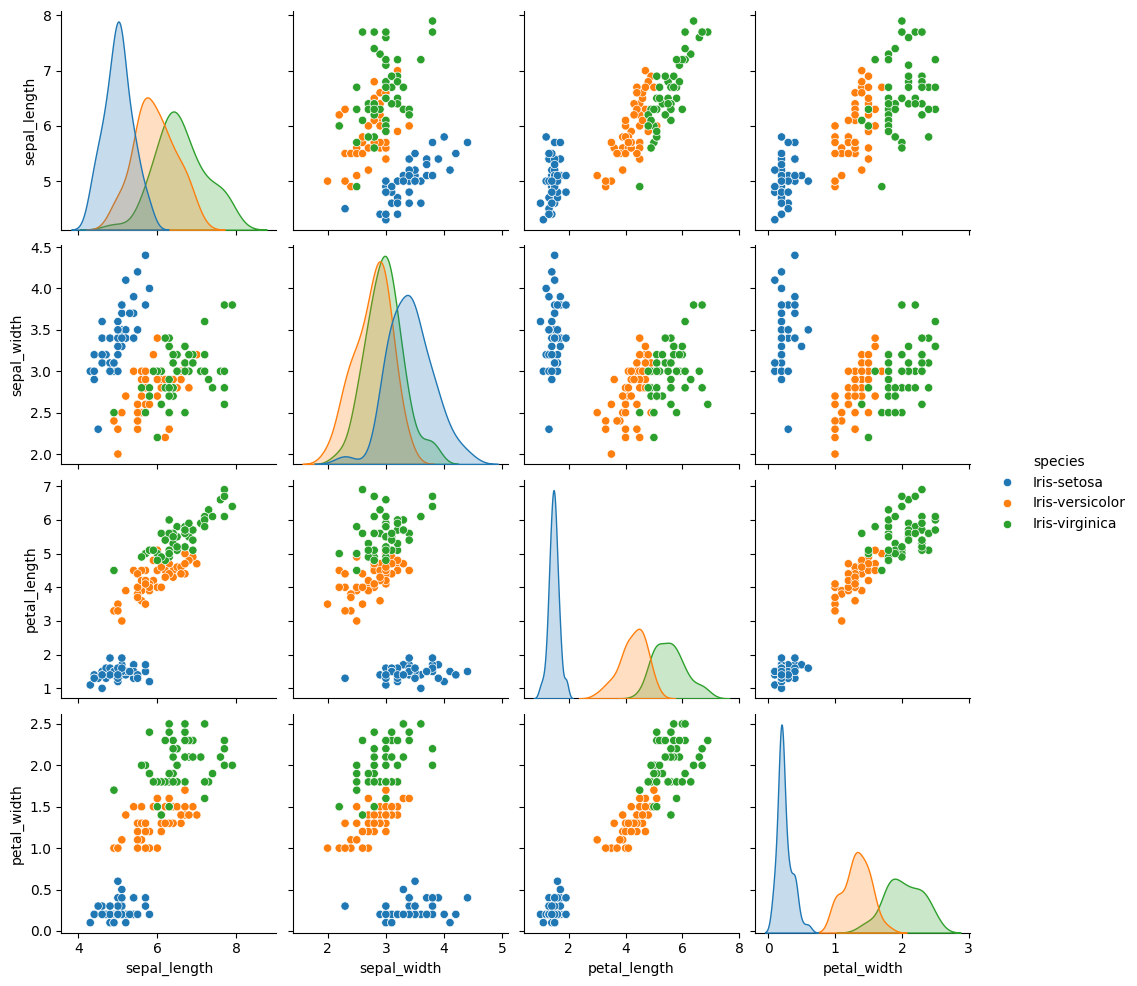

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [50]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue="species")
plt.show()
# Check for missing values
print(iris.isnull().sum())

### Data Preprocessing

In [51]:
# Binarize the target variable
iris["target"] = np.where(iris["species"] == "Iris-virginica", 1, 0)
# Drop the original species column
iris = iris.drop(columns=["species"])
print(iris.head())


# split the data into training and test sets
# Split the data into features and target
X = iris.drop(columns=["target"])
y = iris["target"]
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
Training set shape: (120, 4)
Testing set shape: (30, 4)


### Feature Scaling


In [52]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data:")
print(X_train_scaled[:5])

Scaled training data:
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]


### Model Training


In [53]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train_scaled, y_train)
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.17705268 -0.65559404  2.32182293  2.85727663]]
Intercept: [-3.70951767]


### Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Confusion Matrix

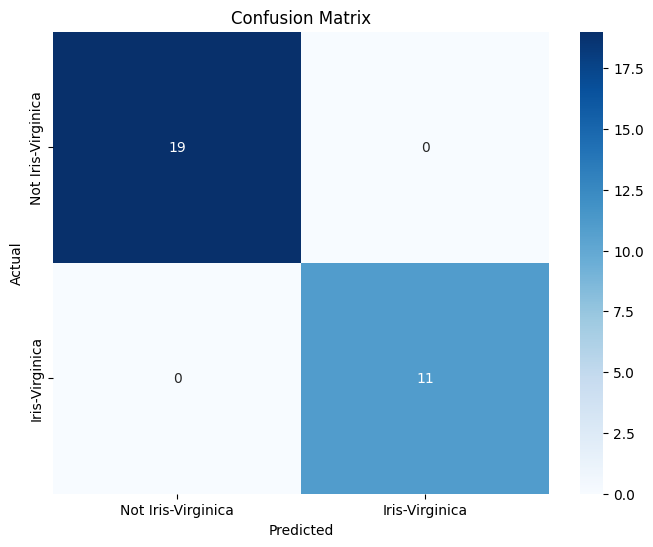

In [55]:
import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
 xticklabels=['Not Iris-Virginica', 'Iris-Virginica'], 
 yticklabels=['Not Iris-Virginica', 'Iris-Virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
          

# Mini Challenge

## Loading The Data Set

### Using Lab Method

Loading the Data using the method described in lab

- With this method, the column names are not with the dataset so we have to define them correctly ourselves.

In [56]:
# Load the banknote authentication dataset
url = "https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip"
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_data = pd.read_csv(url, header=None, names=columns)

### Using UCI Method

Using the method as described by UCI

- With this method, the column names are with the data so we don't have to define them which makes it easier for us.

#### Install the library

In [57]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


#### Downloading and Loading the dataset

In [58]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

banknote_data = pd.DataFrame(data=X, columns=banknote_authentication.feature_names)
banknote_data['class'] = y

print(banknote_data.head())

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.2443

### Display the Data

In [59]:
print(banknote_data.head())
print(banknote_data.tail())
print(banknote_data.describe())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
      variance  skewness  curtosis  entropy  class
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.

## Data Exploration and Visualization

### Pairplot

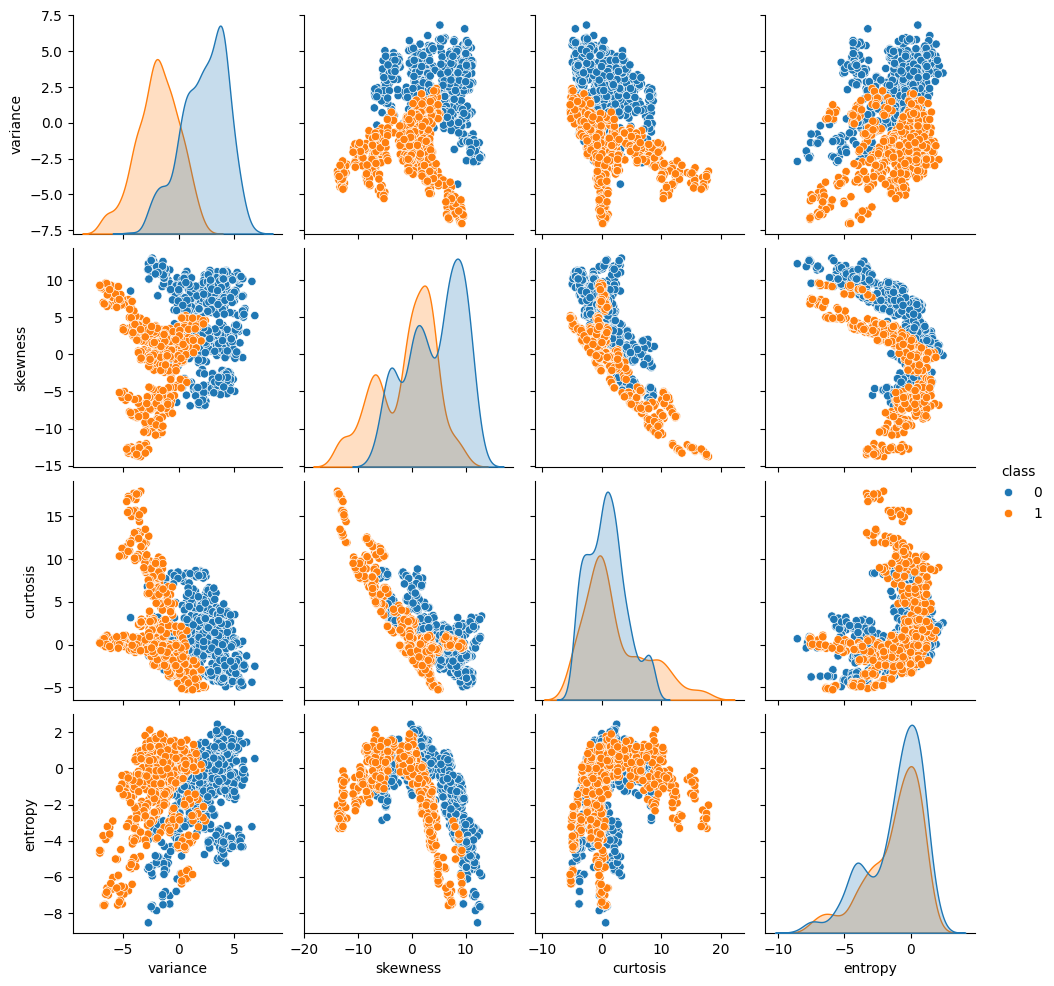

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [60]:
# Visualize the distribution of each feature
sns.pairplot(banknote_data, hue="class")
plt.show()
# Check for missing values
print(banknote_data.isnull().sum())

### Correlation Matrix

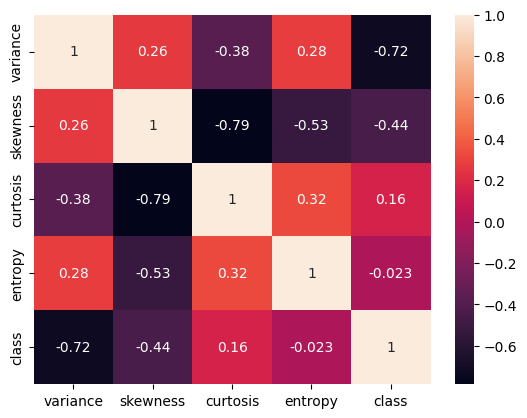

In [61]:
# creating Correlation matrix
corr = banknote_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Data Preproccessing

- Binarization is not needed as the class is already a binary value 0 or 1
- Also we check the balance of the data

[0 1]
class
0    762
1    610
Name: count, dtype: int64


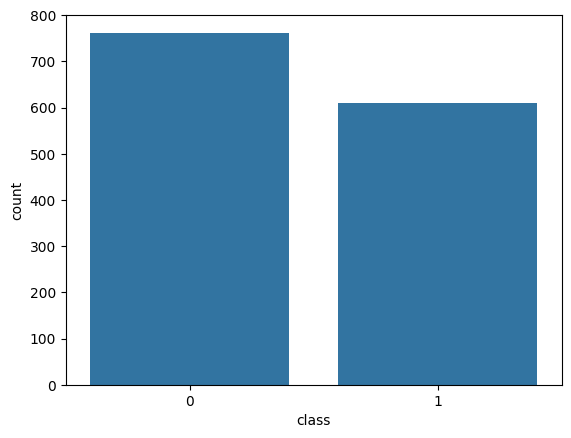

In [62]:
# check whether the Class column has binary values
print(banknote_data["class"].unique())
# check the distribution of the target variable
sns.countplot(x="class", data=banknote_data)
# check if data is balanced
print(banknote_data["class"].value_counts())

### Splitting Data

In [63]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1097, 4)
Testing set shape: (275, 4)


### Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data:")
print(X_train_scaled[:5])

Scaled training data:
[[-0.6391558   1.80557961 -0.18836535 -3.05096841]
 [ 0.82188925  0.85239902 -0.59407847  0.60345479]
 [-1.65703344 -1.63328321  2.38386151 -0.34235536]
 [ 1.72886098  0.32863093 -0.74807722  1.08444894]
 [ 0.11397258  0.2059923   0.32509151  0.53465595]]


## Model Training

In [65]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train_scaled, y_train)

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-4.77298485 -4.66795507 -4.28037011  0.26519098]]
Intercept: [-1.50784633]


## Model Evaluation

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9781818181818182
Confusion Matrix:
 [[144   4]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



### Confusion Matrix

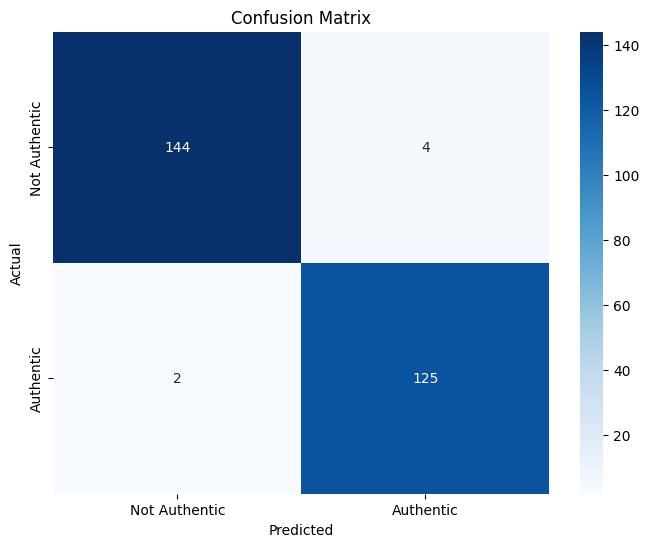

In [68]:
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Authentic", "Authentic"],
    yticklabels=["Not Authentic", "Authentic"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

### ROC-AUC

ROC-AUC: 0.9994679719089169


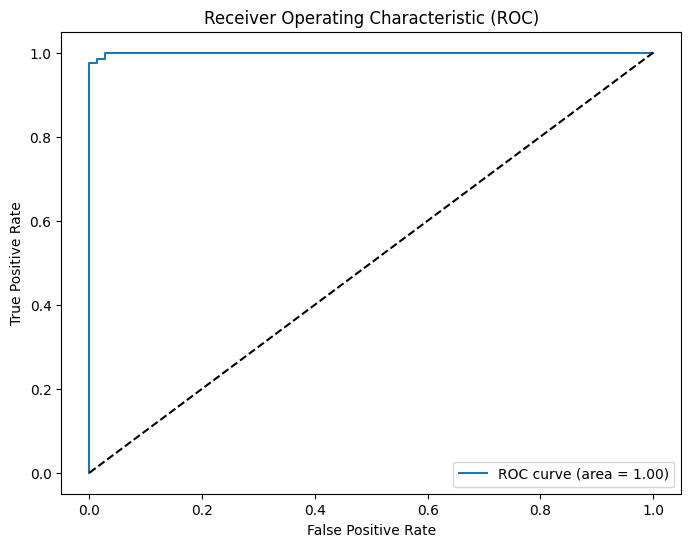

In [69]:
# ROC-AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

### Exploring impact of L2 Regulariztion on Model

-  By default model gets trained by L2 regularization
-  By trying L1 regularization we get improved acurracy but model might get overfitted

In [70]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(penalty='l1', solver='liblinear')
# Train the model
model.fit(X_train_scaled, y_train)

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='liblinear')

In [71]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-7.47660615 -8.17418276 -7.35672876  0.03743372]]
Intercept: [-3.14418261]


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9854545454545455
Confusion Matrix:
 [[146   2]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



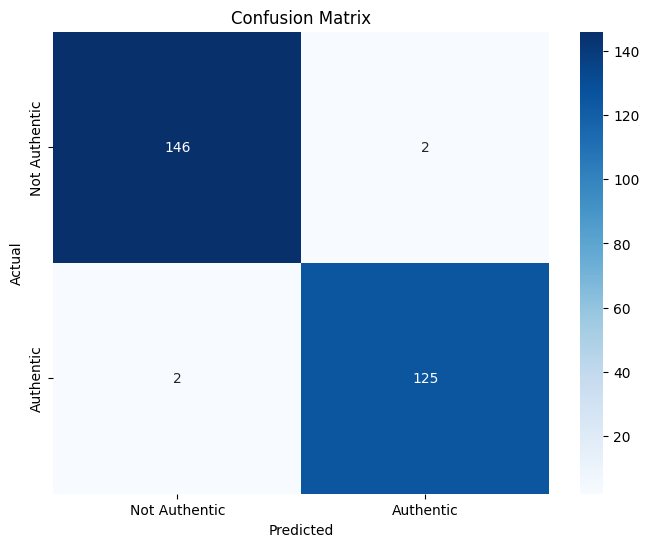

In [73]:
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Authentic", "Authentic"],
    yticklabels=["Not Authentic", "Authentic"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

ROC-AUC: 0.9995743775271335


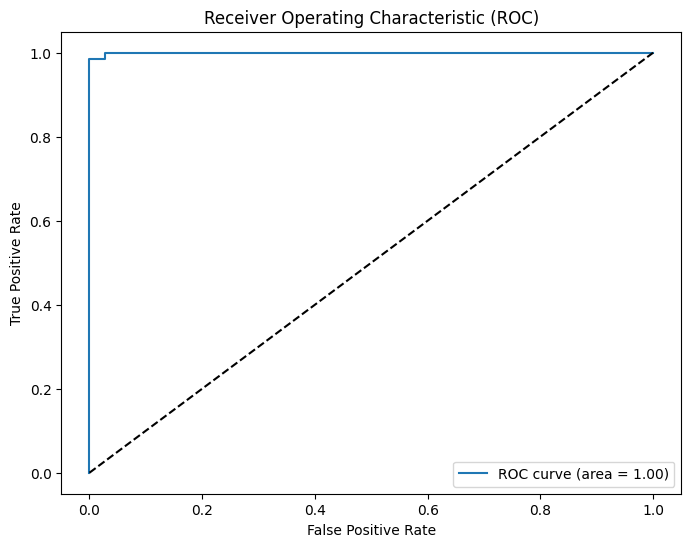

In [74]:
# ROC-AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

### Bonus: 

-   Improving the model by tuning hyperparameters by using grid search
-   We got following result:

`LogisticRegression(C=100, penalty='l1', solver='liblinear')`

These are best hyper parameter.

In [75]:
# using GridSearchCV
# to find the best parameters.

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear"],
}

# Initialize the logistic regression model
model = LogisticRegression()
# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
# Fit the model
grid_search.fit(X_train_scaled, y_train)

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\skl

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [76]:
# print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Get the best model
best_model = grid_search.best_estimator_
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9854545454545455
Confusion Matrix:
 [[146   2]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

